<a href="https://colab.research.google.com/github/kensley1972/CursoGit2.0/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
tf.__version__

'2.18.0'

## Carregando Imagens

###Base de dados:
https://www.kaggle.com/datasets/tongpython/cat-and-dog?resource=download

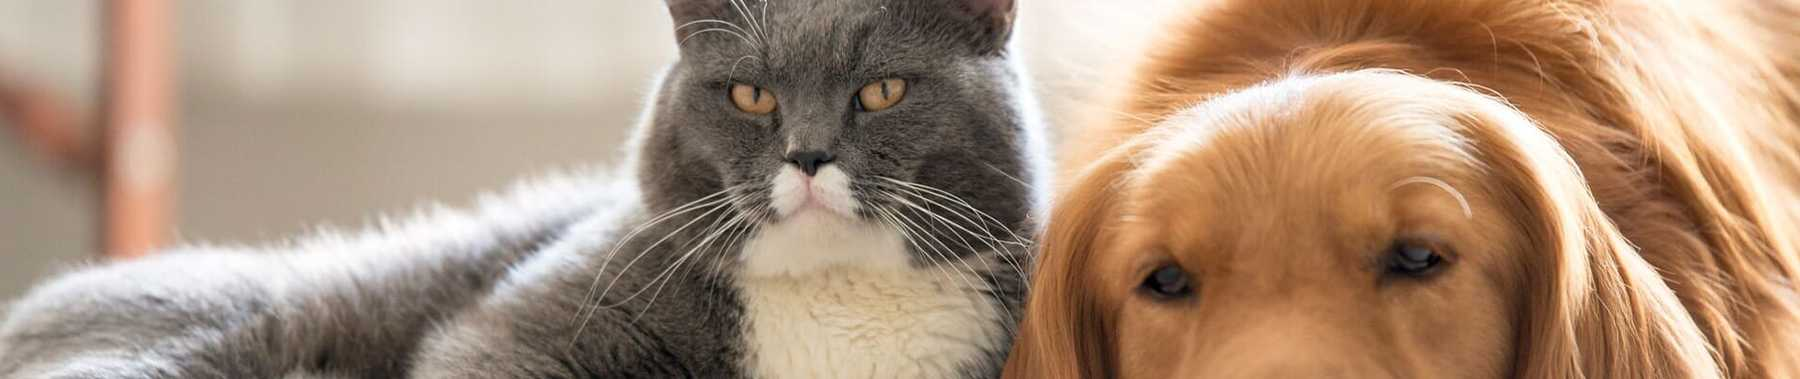

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/MiniCurso - CNN/CatVsDog.zip'
zip_object = zipfile.ZipFile(file = path, mode= 'r')
zip_object.extractall('./')
zip_object.close()

Bases Treinamento e teste

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range = 14, horizontal_flip=True, zoom_range=0.2)

In [ ]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/training_set/training_set', target_size=(224,224), batch_size=8, class_mode='categorical', shuffle=True)

Found 8005 images belonging to 2 classes.


In [ ]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
dataset_treinamento.class_indices

{'cats': 0, 'dogs': 1}

## Construção da rede neural


In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [ ]:
dataset_teste = gerador_teste.flow_from_directory('/content/test_set/test_set', target_size=(224,224), batch_size=1, class_mode='categorical', shuffle=False)

Found 2023 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [ ]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 577)            │    12,482,241 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,836,295 (48.97 MB)

 Trainable params: 12,836,295 (48.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
network.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
historico = network.fit(dataset_treinamento, epochs=20)

Epoch 1/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 119s 116ms/step - accuracy: 0.5693 - loss: 0.6747
Epoch 2/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 133s 109ms/step - accuracy: 0.7044 - loss: 0.5702
Epoch 3/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 144s 110ms/step - accuracy: 0.7399 - loss: 0.5206
Epoch 4/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 111s 111ms/step - accuracy: 0.7609 - loss: 0.4765
Epoch 5/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 114s 114ms/step - accuracy: 0.7829 - loss: 0.4493
Epoch 6/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 137s 109ms/step - accuracy: 0.7847 - loss: 0.4455
Epoch 7/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 111s 111ms/step - accuracy: 0.7945 - loss: 0.4448
Epoch 8/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 108s 108ms/step - accuracy: 0.8121 - loss: 0.4074
Epoch 9/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 109s 109ms/step - accuracy: 0.8226 - loss: 0.3836
Epoch 10/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 111s 110ms/step - accuracy: 0.8323 - loss: 0.3746
Epoch 11/20
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.8435 -

## Avaliação da rede Neural

In [ ]:
dataset_teste.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

2023/2023 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


array([[1.07970717e-03, 9.98920321e-01],
       [9.33679864e-02, 9.06632006e-01],
       [9.56068516e-01, 4.39314842e-02],
       ...,
       [8.75881970e-01, 1.24118075e-01],
       [4.08632793e-02, 9.59136724e-01],
       [7.34325848e-04, 9.99265730e-01]], dtype=float32)

In [ ]:
previsoes = np.argmax(previsoes, axis=1)
previsoes

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
dataset_teste.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(dataset_teste.classes, previsoes)

0.8255066732575383

<Axes: >

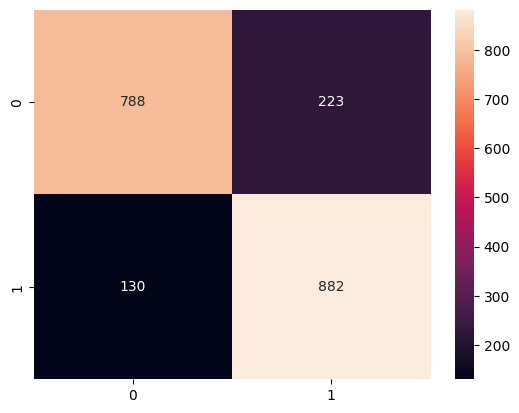

In [ ]:
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
classificacao_report = classification_report(dataset_teste.classes, previsoes)
print(classificacao_report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1011
           1       0.80      0.87      0.83      1012

    accuracy                           0.83      2023
   macro avg       0.83      0.83      0.83      2023
weighted avg       0.83      0.83      0.83      2023



## Salvando e carregando

In [ ]:
model_json = network.to_json()
with open('network.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

In [ ]:
with open('/content/drive/MyDrive/MiniCurso - CNN/network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_2", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "name": "input_layer_2"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_6", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.i

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/MiniCurso - CNN/weights.hdf5')
network_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
network_loaded.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 577)            │    12,482,241 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,836,295 (48.97 MB)

 Trainable params: 12,836,295 (48.97 MB)

 Non-trainable params: 0 (0.00 B)

## Testando

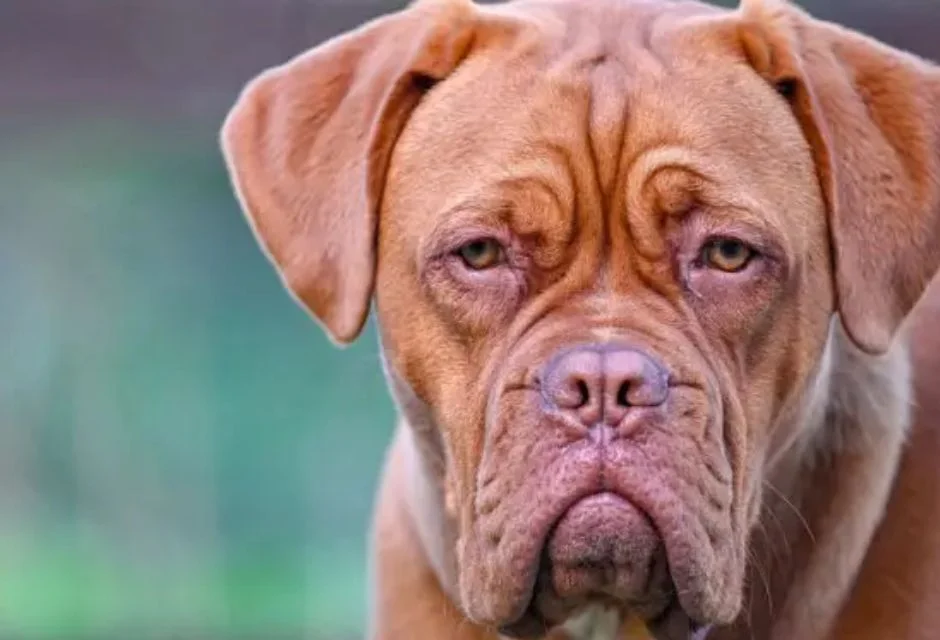

In [ ]:
imagem_teste = cv2.imread('/content/drive/MyDrive/MiniCurso - CNN/cachorro2.png')
cv2_imshow(imagem_teste)

In [ ]:
imagem_teste.shape

(640, 940, 3)

In [ ]:
image_padronizada = cv2.resize(imagem_teste, (224,224))

array([[[103,  88,  92],
        [103,  88,  92],
        [103,  87,  94],
        ...,
        [103,  90,  96],
        [102,  91,  98],
        [104,  92,  96]],

       [[104,  87,  92],
        [103,  88,  92],
        [103,  88,  92],
        ...,
        [102,  88,  95],
        [100,  86,  93],
        [101,  88,  92]],

       [[105,  87,  92],
        [103,  88,  92],
        [103,  88,  92],
        ...,
        [101,  87,  94],
        [100,  86,  93],
        [ 96,  84,  88]],

       ...,

       [[142, 167, 122],
        [142, 168, 121],
        [142, 168, 119],
        ...,
        [ 86,  95, 143],
        [ 88,  94, 143],
        [ 86,  92, 141]],

       [[137, 161, 117],
        [137, 162, 117],
        [137, 163, 115],
        ...,
        [ 85,  93, 142],
        [ 87,  93, 142],
        [ 86,  92, 141]],

       [[134, 155, 113],
        [134, 155, 111],
        [134, 156, 109],
        ...,
        [ 79,  88, 136],
        [ 85,  91, 140],
        [ 85,  91, 140]]], dtype=uint8)
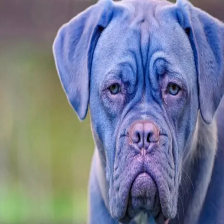

In [ ]:
image_padronizada

In [ ]:
image_padronizada = image_padronizada/255
image_padronizada

array([[[0.40392157, 0.34509804, 0.36078431],
        [0.40392157, 0.34509804, 0.36078431],
        [0.40392157, 0.34117647, 0.36862745],
        ...,
        [0.40392157, 0.35294118, 0.37647059],
        [0.4       , 0.35686275, 0.38431373],
        [0.40784314, 0.36078431, 0.37647059]],

       [[0.40784314, 0.34117647, 0.36078431],
        [0.40392157, 0.34509804, 0.36078431],
        [0.40392157, 0.34509804, 0.36078431],
        ...,
        [0.4       , 0.34509804, 0.37254902],
        [0.39215686, 0.3372549 , 0.36470588],
        [0.39607843, 0.34509804, 0.36078431]],

       [[0.41176471, 0.34117647, 0.36078431],
        [0.40392157, 0.34509804, 0.36078431],
        [0.40392157, 0.34509804, 0.36078431],
        ...,
        [0.39607843, 0.34117647, 0.36862745],
        [0.39215686, 0.3372549 , 0.36470588],
        [0.37647059, 0.32941176, 0.34509804]],

       ...,

       [[0.55686275, 0.65490196, 0.47843137],
        [0.55686275, 0.65882353, 0.4745098 ],
        [0.55686275, 0

In [ ]:
image_padronizada.shape

(224, 224, 3)

In [ ]:
image_padronizada = image_padronizada.reshape(-1,224,224,3)
image_padronizada.shape

(1, 224, 224, 3)

In [ ]:
previsao = network_loaded.predict(image_padronizada)
previsao

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[8.0113980e-04, 9.9919885e-01]], dtype=float32)

In [ ]:
previsoes = np.argmax(previsao, axis=1)
previsoes

array([1])

In [ ]:
if previsoes == 0:
  print('Gato 🙀')
else:
  print('Cachorro 🐶')


Cachorro 🐶
